<a href="https://colab.research.google.com/github/iamsommyajain/Potato-Disease-Detection/blob/main/Potato_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
 95% 36.0M/37.8M [00:02<00:00, 19.7MB/s]
100% 37.8M/37.8M [00:02<00:00, 13.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
import cv2
import seaborn as sns
import random

In [6]:
DATADIR='/content/Potato Disease'
CATEGORIES = ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']

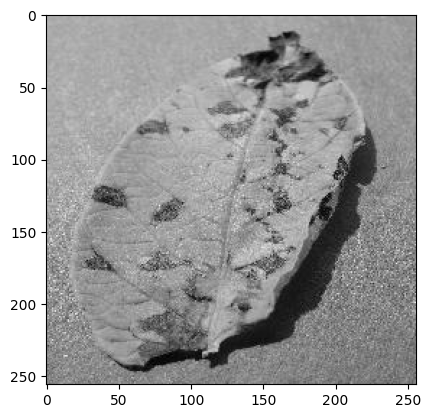

In [7]:
for category in CATEGORIES :
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap = 'gray')
    plt.show()
    break
  break

array([[171, 173, 176, ..., 157, 155, 152],
       [172, 174, 176, ..., 159, 157, 154],
       [171, 172, 173, ..., 159, 158, 157],
       ...,
       [135, 139, 125, ..., 101, 114, 140],
       [102, 142, 122, ...,  97, 120, 137],
       [138, 136, 110, ...,  97, 126, 127]], dtype=uint8)
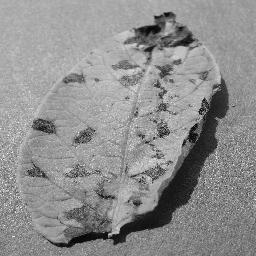

In [8]:
img_array

In [9]:
img_array.shape

(256, 256)

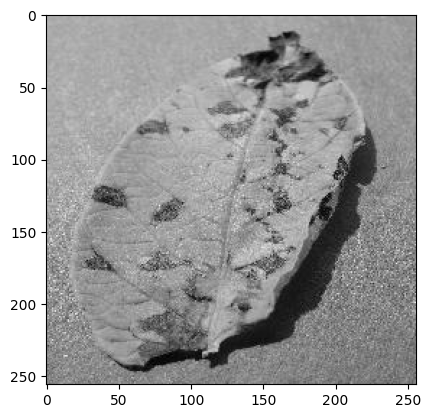

In [10]:
IMG_SIZE = 256
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [11]:
training_data = []

def create_training_data():
  for category in CATEGORIES :
    path = os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()

In [12]:
len(training_data)

2152

In [13]:
random.shuffle(training_data)

In [14]:
X = []
y =[]

for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [15]:
type(X), type (y)

(numpy.ndarray, numpy.ndarray)

In [16]:
X=X/255

Building CNN Model

In [17]:
model = keras.Sequential([
    #CONVOLUTIONAL LAYER 1
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=X.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #CONVOLUTIONAL LAYER 1
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #FLATTENING LAYER
    keras.layers.Flatten(),

    #HIDDEN LAYER
    keras.layers.Dense(64, activation='relu'),

    #OUTPUT LAYER
    keras.layers.Dense(3, activation='softmax')
]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.fit(X,y,epochs=10,batch_size=32, validation_split=0.1)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.5344 - loss: 1.6937 - val_accuracy: 0.8472 - val_loss: 0.4494
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.8556 - loss: 0.3946 - val_accuracy: 0.8796 - val_loss: 0.3216
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9099 - loss: 0.2494 - val_accuracy: 0.8843 - val_loss: 0.2883
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9400 - loss: 0.1871 - val_accuracy: 0.8843 - val_loss: 0.3246
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9572 - loss: 0.1182 - val_accuracy: 0.8750 - val_loss: 0.3830
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9771 - loss: 0.0736 - val_accuracy: 0.8750 - val_loss: 0.4025
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9876 - loss: 0.0404 - val_accuracy: 0.8843 - val_loss: 0.4292
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9966 - loss: 0.0188 - val_accuracy: 0.8843 -